# 1 次元線型移流方程式

1 次元の線型移流方程式は CFD（computational fluid dynamics, 数値流体力学）を勉強するのに使われるもっとも単純で基本的なモデルだ。
この小さな方程式が教えてくれることはとても多いことには驚くばかりだ。
その方程式は次の通り。

\begin{align}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{align}

与えられた初期条件（*波*とみなされる）のもとで、方程式は形が変わらない速度 $c$ の初期の*波*の伝播を表す。
初期条件を $u(x,0)=u_0(x)$ としよう。
すると方程式の厳密解 $u(x,t)=u_0(x-ct)$ となる。

この方程式を時間・空間ともに離散化しよう。
時間に対しては前進差分スキームを、空間に対しては後退差分スキームを使う。
空間座標 $x$ の離散化は $i=0$ から $N$ でインデックスをつけ、サイズ $\Delta t$ の離散時間間隔でステップしていくことを考える。

微分の定義から単純に極限を取り除いて次の近似式が出る。

\begin{align}
\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}
\end{align}

離散化した方程式は次のようになる。

\begin{align}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0
\end{align}

ここで $n$ と $n+1$ は時間に関する連続したステップで、
$i-1$ と $i$ は離散化した $x$ 座標の隣り合う二点を表している。
与えられた初期条件があるならこの離散化で未知要素は $u_i^{n+1}$ だけだ。
未知項を求めるための方程式が次のように出せるからもとの差分方程式も解ける。
時間に関して前方差分を取ったこともここで効いている。

\begin{align}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{align}

ではこれを Python で実装してみよう。
まずいくつかのライブラリをインポートしておく。

- `numpy` は行列計算のために使うライブラリ。
- `matplotlib` は計算結果をプロットする (グラフを描く) ために使うライブラリ。
- `time` と `sys` はアニメーションのスピードを調整するのに使う基本的な時間関係の関数が集まったライブラリ。

In [1]:
# Python のコメントは # 以下に書く
import numpy as np
import matplotlib.pyplot as plt
import time, sys

# これでプロットが jupyter notebook 上でも表示できるようになる
%matplotlib inline                  

いくつか変数を定義しよう。
$x_i\in(0,2)$ のように 2 の倍数の長さの空間領域内の点を均等に分割したグリッドを定義したい。
グリッド上の点の数を表す変数 `nx` を定義し、`dx` をグリッド上隣りあった点の任意のペアの間の距離とする。

In [12]:
nx = 41
dx = 2 / (nx-1)
nt = 25    # nt は計算したい時間ステップ数
dt = .025  # dt は時間のステップ量
c = 1      # 波速度

初期条件 $u_0$ は次のように定義する: 帽子型の関数だ。

\begin{align}
 u_0(x)
 \begin{cases}
  2, & x \in [0.5, 1], \\
  1, & \text{otherwise}.
 \end{cases}
\end{align}

`ones()` は numpy のメソッドで `nx` 個の要素を全て 1 で埋める。

In [6]:
# 全部 1 で初期化
u = np.ones(nx)
# 初期条件として 0.5 から  1 を 2 でセットする
u[int(.5 / dx):int(1 / dx + 1)] = 2
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


`matplotlib.pyplot` を使って初期条件をグラフにして見てみよう。
matplotlib については [Gallery](http://matplotlib.org/gallery.html) を見るといろいろな使い方もわかる。

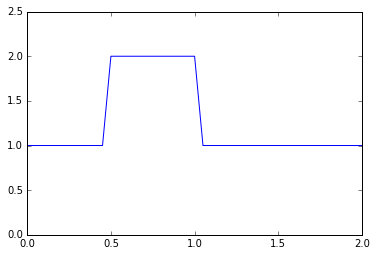

In [9]:
plt.ylim([0, 2.5])
plt.plot(np.linspace(0, 2, nx), u);
plt.show()

移流方程式を有限差分スキームで解こう。

配列 `u` に対して $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$ という計算をしていけばいい。
ループで計算すると遅いので numpy の array をうまく使って計算する。

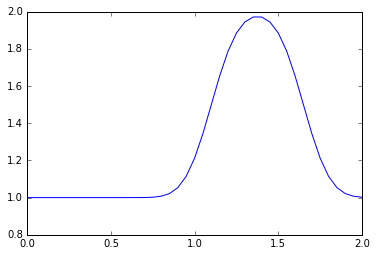

In [11]:
# 全部 1 で初期化
u = np.ones(nx)
# 初期条件として 0.5 から  1 を 2 でセットする
u[int(.5 / dx):int(1 / dx + 1)] = 2

# numpy の配列を初期化
un = np.ones(nx)

# 0 から nt まで時間を進めるためのループ
for n in range(nt):
    un = u.copy()
    #u[0] = 1
    # numpy.array をうまく使うとループを使わずに書ける：この方が綺麗だし何より速い
    u[1:] = un[1:] - c * dt / dx * (un[1:] - un[0:-1])

# プロット
plt.plot(np.linspace(0, 2, nx), u)
plt.show()

確かに元の帽子型の初期値が正の方向に移動した。しかしもう最初の厳密な帽子型ではない。

## 大事なこと
離散化パラメータを変えて実験してみよう。
数値計算のデバッグ一般論としても重要だ。
パラメータを変えていろいろ実験していると変な振る舞いを起こすことがある。
簡単に調べてみよう。

## 収束と CFL 条件
CFL 条件（Courant-Friedrichs-Lewy Condition）またはクーラン条件はコンピュータシミュレーションの計算（数値解析）で「情報が伝播する速さ」を「実際の現象で波や物理量が伝播する速さ」よりも早くしなければならないという必要条件のこと。
詳しくは [Wikipedia](https://ja.wikipedia.org/wiki/CFL条件) 参照。

はじめの数回では同じ一般的な初期条件, 境界条件を使った。
パラメータの変更を検証しやすくするため関数化する。
何がどこにどう影響するかを見やすくするためここでは**グリッドのサイズ**だけを調整していく。

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    # nt は時間ステップ数
    dt = .025  # dt 時間ステップの量: いわゆる \Delta t
    c = 1

    # 初期条件
    # まず 1 で埋める
    u = np.ones(nx)
    # 0.5 から 1 の間は 2 で埋めて帽子型関数にする
    u[int(.5/dx):int(1 / dx + 1)] = 2

    # 計算用の一時配列を定義
    un = np.ones(nx)

    # 必要な時間分ループを回す
    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] - c * dt / dx * (un[1:] - un[0:-1])

    plt.ylim([-1, 4])
    plt.plot(np.linspace(0, 2, nx), u);

線型移流方程式をメッシュをどんどん細かくしながら解いていこう。

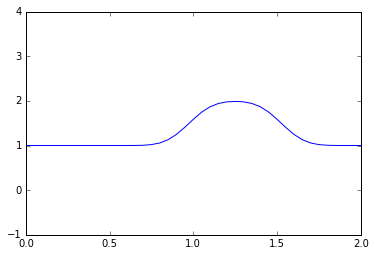

In [15]:
linearconv(41) # 41 グリッド

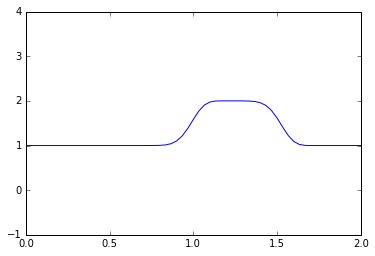

In [16]:
linearconv(61)

拡散効果は出ているが、緩やかになっている。

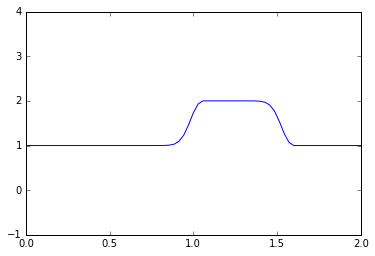

In [17]:
linearconv(71)

先程よりも形が四角形に近くなっている。

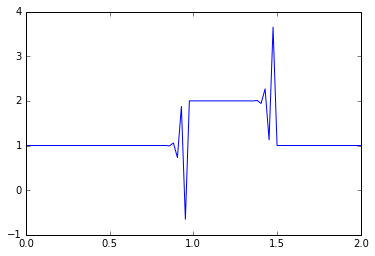

In [21]:
linearconv(85)

他の結果とはまったく違う傾向が見られる。

新バージョンのコードでは CFL 数を `dx` のサイズに依存して適切な時間ステップ `dt` を計算している。

### 何が起きたのか？

時間発展させるところのコードを見てみる必要がある。
次の時間ステップで波の測度を評価するために既存のデータを使っている。
最初グリッドの点が増えるほど答えはどんどん正確になっていく。
数値的な拡散はより少なくなり、方形波はどんどん正方形に近づいていく。

時間ステップ $\Delta t$ は $0.025$ として定義した。
この計算の間、それぞれの $x$ の位置で波の速さを評価した。
最後のプロットでは明らかにおかしなことになっている。
これは時間 $\Delta t$ の間に波は `dx` よりも長い距離を動いていることが問題だ。
それぞれのグリッドの長さ `dx` は全ての点の数 `nx` と関係している。
時間のステップサイズ $\Delta t$ が `dx` の大きさから計算されているなら適切な安定性を保証できるようになる。
\begin{align}
 \sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\mathrm{max}}.
\end{align}
ここで $u$ は波の速さだ。
$\sigma$ は**クーラン数**と呼ばれ、
$\sigma_{\mathrm{max}}$ は離散化スキームにより異なる安定性を保証してくれる数だ。

新バージョンのコードでは CFL 数を `dx` のサイズに依存して適切な時間ステップ `dt` を計算している。

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    # nt は時間ステップ数
    c = 1
    sigma = .5

    # 時間ステップの量: いわゆる \Delta t
    dt = sigma * dx

    # 初期条件設定
    u = np.ones(nx)
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = np.ones(nx)

    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] - c * dt / dx * (un[1:] - un[0:-1])

    plt.ylim([0.8, 2.5])
    plt.plot(np.linspace(0, 2, nx), u)

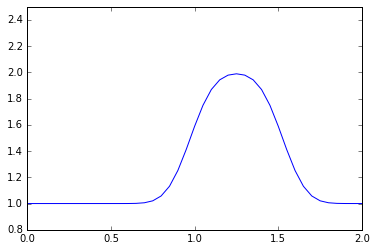

In [4]:
linearconv(41)

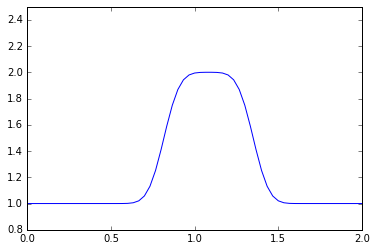

In [27]:
linearconv(61)

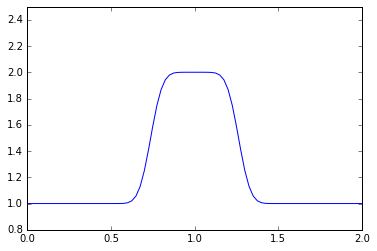

In [28]:
linearconv(81)

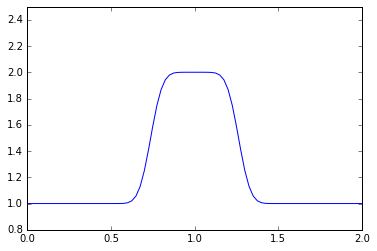

In [29]:
linearconv(81)

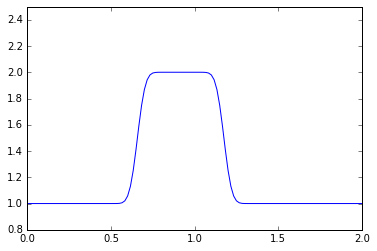

In [31]:
linearconv(121)

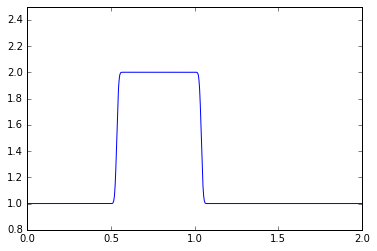

In [11]:
linearconv(500)

`nx` が増えるにつれて波の移流がどんどん小さくなっていることに注意しよう。

### アニメーションつきシミュレーション

[ここ](http://gforsyth.github.io/instructions,/reference/2014/03/01/installing-jsanimation.html)を参考に `JSAnimaiton` をインストールする。

~~~~
git clone https://github.com/jakevdp/JSAnimation.git

cd JSAnimation/
python setup.py install --user

from JSAnimation.IPython_display import display_animation
~~~~

`ctrl+Enter` で次のセルを実行してほしい.


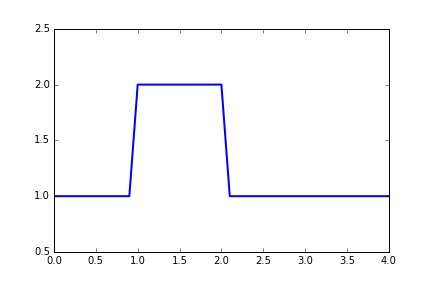
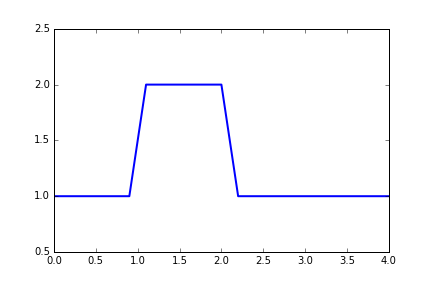
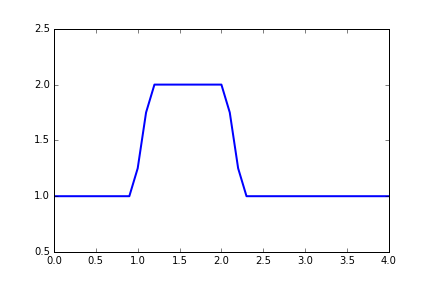
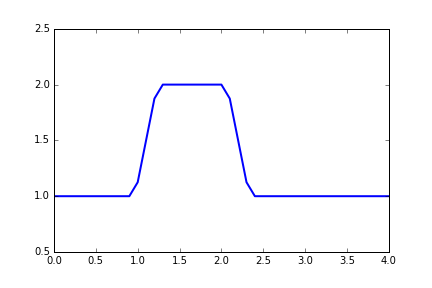
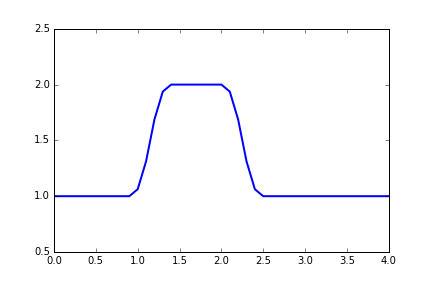
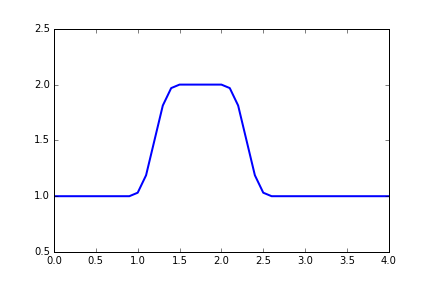
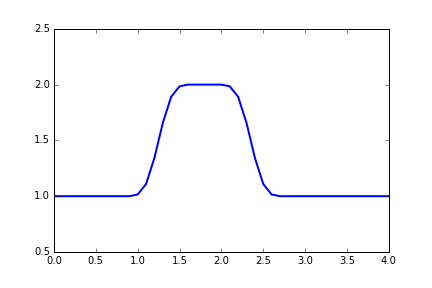
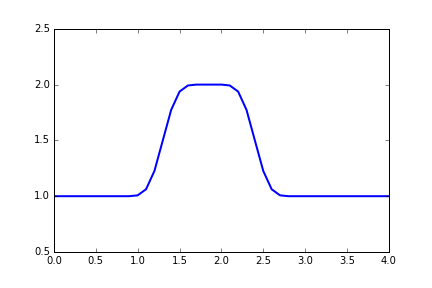
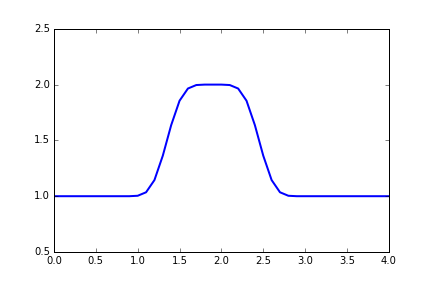
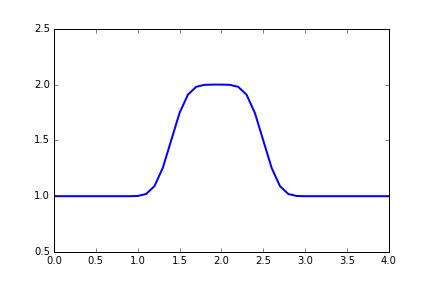
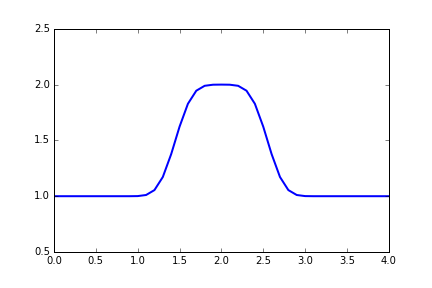
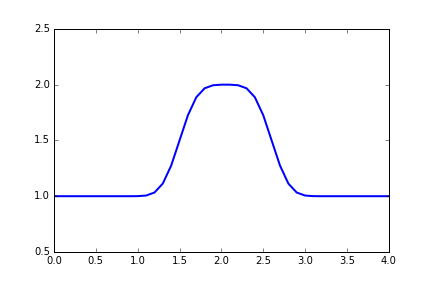
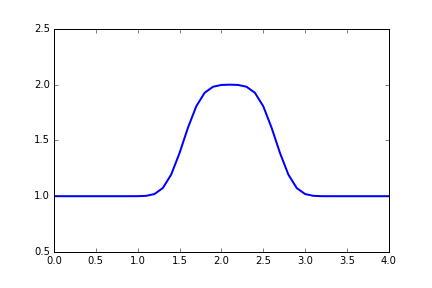
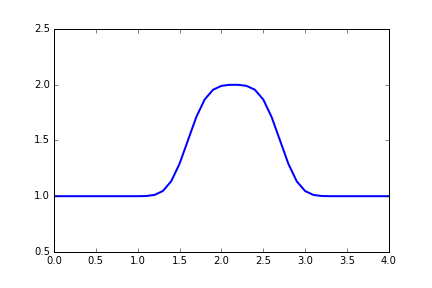
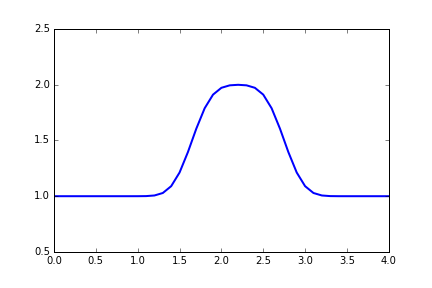
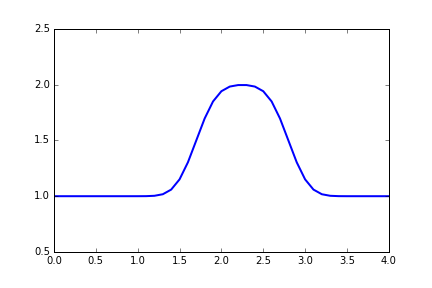
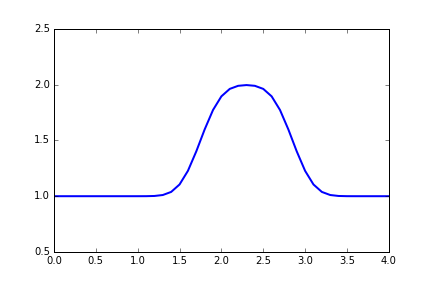
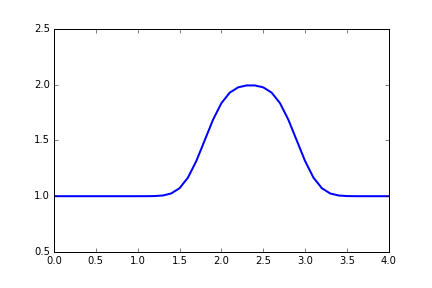
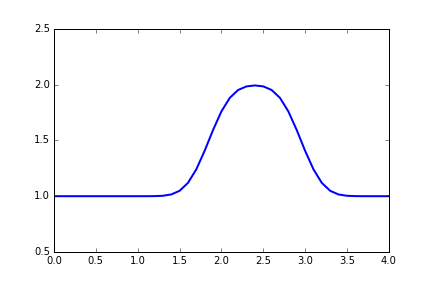
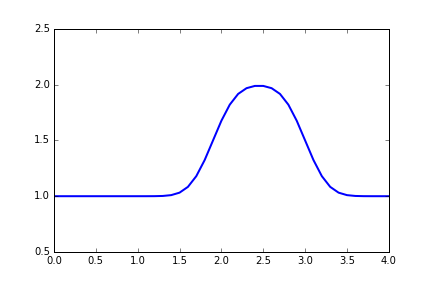

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def linearconv_anim(nx):
    dx = 2 / (nx - 1)
    nt = 20 # nt は時間ステップ数
    c = 1
    sigma = .5

    # 時間ステップの量: いわゆる \Delta t
    dt = sigma * dx

    # 初期条件設定
    u = np.ones(nx)
    u[int(.5/dx):int(1 / dx + 1)] = 2
    
    # 結果の配列と nt, nx の次元を持つ配列で初期化
    un = np.zeros((nt, len(u)))

    # 初期条件を結果の配列の各行にコピー
    un[:,:] = u.copy()
    
    '''
    各タイムステップで u^{n+1} を計算する。
    u の値を u^{n+1} にセットして次のステップの計算ができるようにする。
    各ステップでベクトル u^n は結果の配列 un の単一の行になる。
    '''
    for i in range(1, nt):
        un[i, 1:] = u[1:] - c * dt / dx * (u[1:] - u[0:-1])
        un[i,0] = 1
        u = un[i].copy()

    return un

nx = 41
un = linearconv_anim(nx)
fig = plt.figure();
# グラフの軸の設定
ax = plt.axes(xlim=(0, 4),ylim=(0.5, 2.5));
line, = ax.plot([],[],lw=2);

def animate(data):
    x = np.linspace(0, 4, nx)
    y = data
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='reflect')